In [1]:
!pip install nltk

In [2]:
import pandas as pd 
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

In [3]:
!pip install openpyxl

In [4]:
COC=pd.read_excel("C:\\Users\\parth\\COC REVIEWS - GBA.xlsx")

In [5]:
COC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      297 non-null    object
 1   thumbsUp  300 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [6]:
COC.dropna(subset=("text"), inplace = True)

In [7]:
COC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      297 non-null    object
 1   thumbsUp  297 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


In [8]:
print(COC.columns)

Index(['text', 'thumbsUp'], dtype='object')


In [9]:
COC['lowercase_text'] = COC['text'].str.lower()

In [10]:
COC['no_special_chars'] = COC['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
COC['tokenized_text'] = COC['no_special_chars'].apply(word_tokenize)

In [11]:
stop_words = set(stopwords.words('english'))
COC['text_cleaned'] = COC['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [12]:
print(COC.head())

                                                text  thumbsUp  \
0                                               woww         0   
1  this my one of favraitot game but user support...         0   
2                           The game is not Loading!         0   
3                                               nice         0   
4                                               nice         0   

                                      lowercase_text  \
0                                               woww   
1  this my one of favraitot game but user support...   
2                           the game is not loading!   
3                                               nice   
4                                               nice   

                                    no_special_chars  \
0                                               woww   
1  this my one of favraitot game but user support...   
2                            the game is not loading   
3                                         

In [13]:
COC.to_excel("COC_PROCESSED.xlsx", index=False)

In [14]:
!pip install textblob

In [15]:
from textblob import TextBlob
import ast

In [16]:
COC_PROCESSED = pd.read_excel("COC_PROCESSED.xlsx")

In [17]:
COC_PROCESSED.head()

,text,thumbsUp,lowercase_text,no_special_chars,tokenized_text,text_cleaned
0,woww,0,woww,woww,['woww'],['woww']
1,this my one of favraitot game but user support...,0,this my one of favraitot game but user support...,this my one of favraitot game but user support...,"['this', 'my', 'one', 'of', 'favraitot', 'game...","['one', 'favraitot', 'game', 'user', 'support'..."
2,The game is not Loading!,0,the game is not loading!,the game is not loading,"['the', 'game', 'is', 'not', 'loading']","['game', 'loading']"
3,nice,0,nice,nice,['nice'],['nice']
4,nice,0,nice,nice,['nice'],['nice']


In [18]:
def join_cleaned_text(row):
    try:
        cleaned_list = ast.literal_eval(row)
        return ' '.join(cleaned_list)
    except (ValueError, SyntaxError, TypeError):
        if isinstance(row, list):
            return ' '.join(row)
        return "" 

In [19]:
COC_PROCESSED.head()

,text,thumbsUp,lowercase_text,no_special_chars,tokenized_text,text_cleaned
0,woww,0,woww,woww,['woww'],['woww']
1,this my one of favraitot game but user support...,0,this my one of favraitot game but user support...,this my one of favraitot game but user support...,"['this', 'my', 'one', 'of', 'favraitot', 'game...","['one', 'favraitot', 'game', 'user', 'support'..."
2,The game is not Loading!,0,the game is not loading!,the game is not loading,"['the', 'game', 'is', 'not', 'loading']","['game', 'loading']"
3,nice,0,nice,nice,['nice'],['nice']
4,nice,0,nice,nice,['nice'],['nice']


In [20]:
COC_PROCESSED['text_cleaned_joined'] = COC_PROCESSED['text_cleaned'].apply(join_cleaned_text)

In [21]:
COC_PROCESSED.head()

,text,thumbsUp,lowercase_text,no_special_chars,tokenized_text,text_cleaned,text_cleaned_joined
0,woww,0,woww,woww,['woww'],['woww'],woww
1,this my one of favraitot game but user support...,0,this my one of favraitot game but user support...,this my one of favraitot game but user support...,"['this', 'my', 'one', 'of', 'favraitot', 'game...","['one', 'favraitot', 'game', 'user', 'support'...",one favraitot game user support weak someone h...
2,The game is not Loading!,0,the game is not loading!,the game is not loading,"['the', 'game', 'is', 'not', 'loading']","['game', 'loading']",game loading
3,nice,0,nice,nice,['nice'],['nice'],nice
4,nice,0,nice,nice,['nice'],['nice'],nice


In [22]:
def get_sentiment_score(text):
     return TextBlob(text).sentiment.polarity

In [23]:
COC_PROCESSED['sentiment_score'] = COC_PROCESSED['text_cleaned_joined'].apply(get_sentiment_score)

In [24]:
def get_sentiment_category(score):
    
     if score > 0:
        return 'Positive'
     elif score == 0:
        return 'Neutral'
     else:
        return 'Negative'

In [25]:
COC_PROCESSED['sentiment_category'] = COC_PROCESSED['sentiment_score'].apply(get_sentiment_category)

In [26]:
COCSENTIMENT = 'COC_SENTIMENT.xlsx'
COC_PROCESSED.to_excel(COCSENTIMENT, index=False)

In [36]:
print(COC_PROCESSED[['text', 'sentiment_score', 'sentiment_category']].head().to_string())

                                                                                                                                                        text  sentiment_score sentiment_category
0                                                                                                                                                       woww         0.000000            Neutral
1  this my one of favraitot game but user support is too weak someone hack my account my id didnt get back 13 year hardwork to build to my th and lost my id        -0.258333           Negative
2                                                                                                                                   The game is not Loading!        -0.400000           Negative
3                                                                                                                                                       nice         0.600000           Positive
4                                  

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
SENTIMENT_COUNTS = COC_PROCESSED['sentiment_category'].value_counts()

In [40]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x23c676fe660>,
 [Text(-0.15654599485444176, -1.0888036331198723, 'Positive'),
  Text(0.6568746009801543, 0.8823354002799407, 'Neutral'),
  Text(-0.40342231080261065, 1.0233525488054847, 'Negative')],
 [Text(-0.08538872446605913, -0.5938928907926575, '67.7%'),
  Text(0.3582952368982659, 0.48127385469814943, '16.5%'),
  Text(-0.22004853316506032, 0.5581922993484462, '15.8%')])

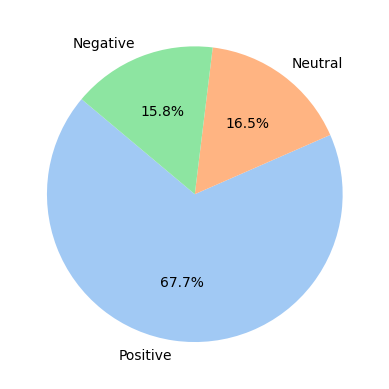

In [42]:
plt.pie(SENTIMENT_COUNTS,
        labels=SENTIMENT_COUNTS.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette('pastel'))

([<matplotlib.patches.Wedge at 0x23c6a07b250>,
 [Text(-0.15654599485444176, -1.0888036331198723, 'Positive'),
  Text(0.6568746009801543, 0.8823354002799407, 'Neutral'),
  Text(-0.40342231080261065, 1.0233525488054847, 'Negative')],
 [Text(-0.08538872446605913, -0.5938928907926575, '67.7%'),
  Text(0.3582952368982659, 0.48127385469814943, '16.5%'),
  Text(-0.22004853316506032, 0.5581922993484462, '15.8%')])

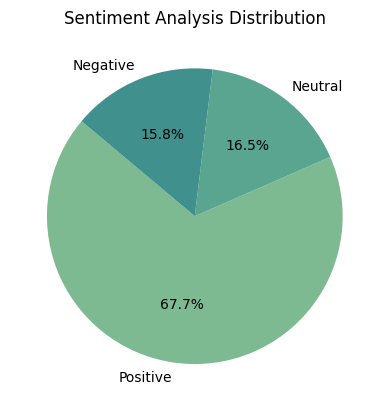

In [52]:
plt.title('Sentiment Analysis Distribution')
plt.pie(SENTIMENT_COUNTS,
        labels=SENTIMENT_COUNTS.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette('crest'))

In [57]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 4.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 5.7 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 9.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 8.9 MB/s  0:00:01

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Vectorize the text data using TF-IDF
# We'll ignore terms that appear in more than 95% of the documents and less than 2 documents.
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(COC_PROCESSED['text'])

# 2. Apply NMF
# We specify 5 topics as requested.
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# 3. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, num_top_words)

# 4. (Optional) Assign the dominant topic to each document in the DataFrame
topic_results = nmf_model.transform(tfidf)
COC_PROCESSED['topic'] = topic_results.argmax(axis=1) + 1  # Adding 1 to make topics 1-5 instead of 0-4

print("\nDataFrame with assigned topics:")
print(COC_PROCESSED[['text', 'topic']].head())

Topic 1:
good play attack friends playing make enjoy game better 10
Topic 2:
game love like great time favourite play old playing beautiful
Topic 3:
nice developers players play game updates days sit childhood want
Topic 4:
best world strategy game games app clash clans play time
Topic 5:
fun play time better getting consuming amazing try say stars

DataFrame with assigned topics:
                                                text  topic
0                                               woww      1
1  this my one of favraitot game but user support...      2
2                           The game is not Loading!      2
3                                               nice      3
4                                               nice      3


C:\Users\parth\AppData\Local\Temp\ipykernel_11812\158056348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


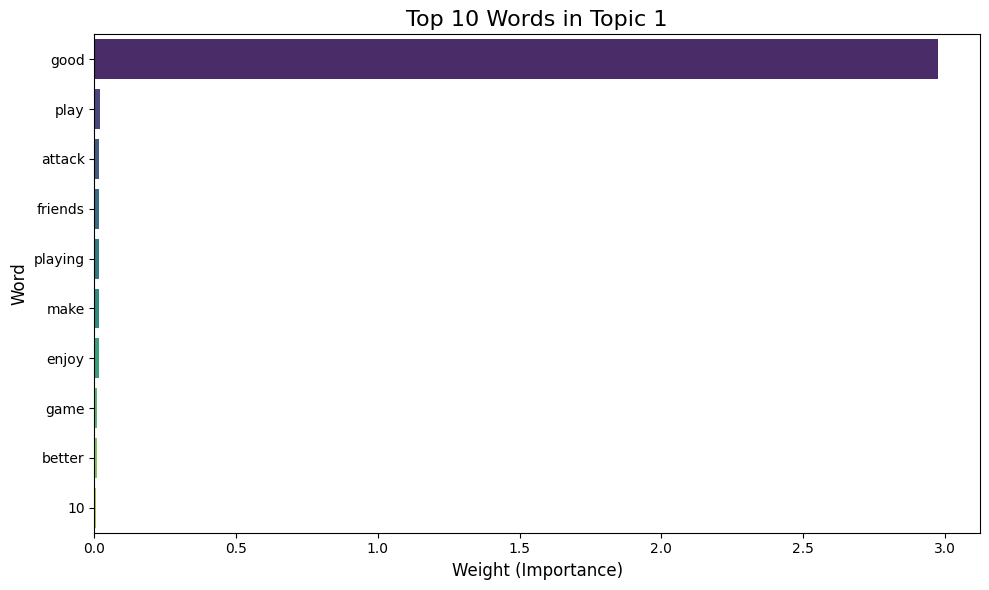

C:\Users\parth\AppData\Local\Temp\ipykernel_11812\158056348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


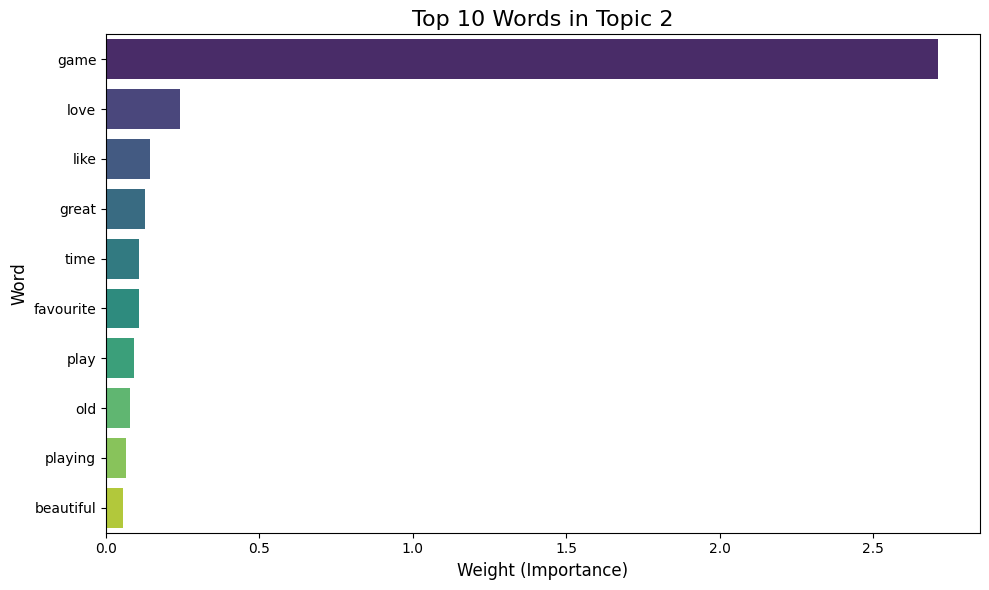

C:\Users\parth\AppData\Local\Temp\ipykernel_11812\158056348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


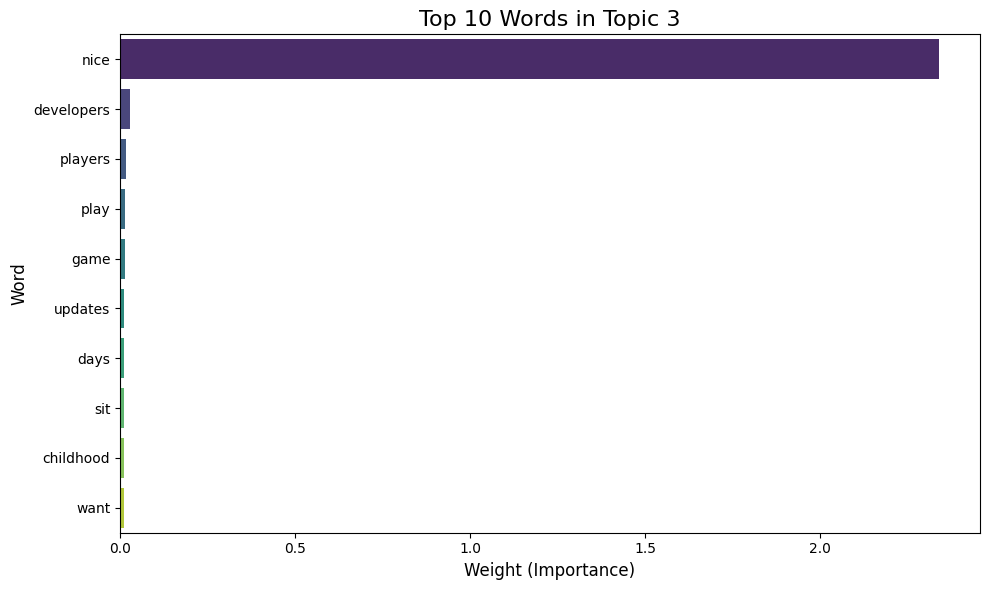

C:\Users\parth\AppData\Local\Temp\ipykernel_11812\158056348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


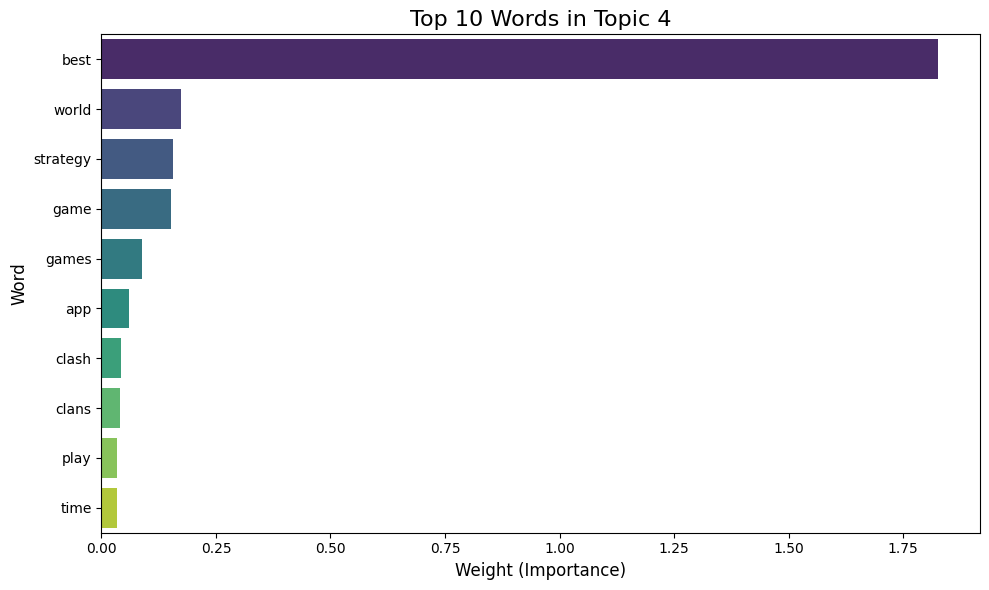

C:\Users\parth\AppData\Local\Temp\ipykernel_11812\158056348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')


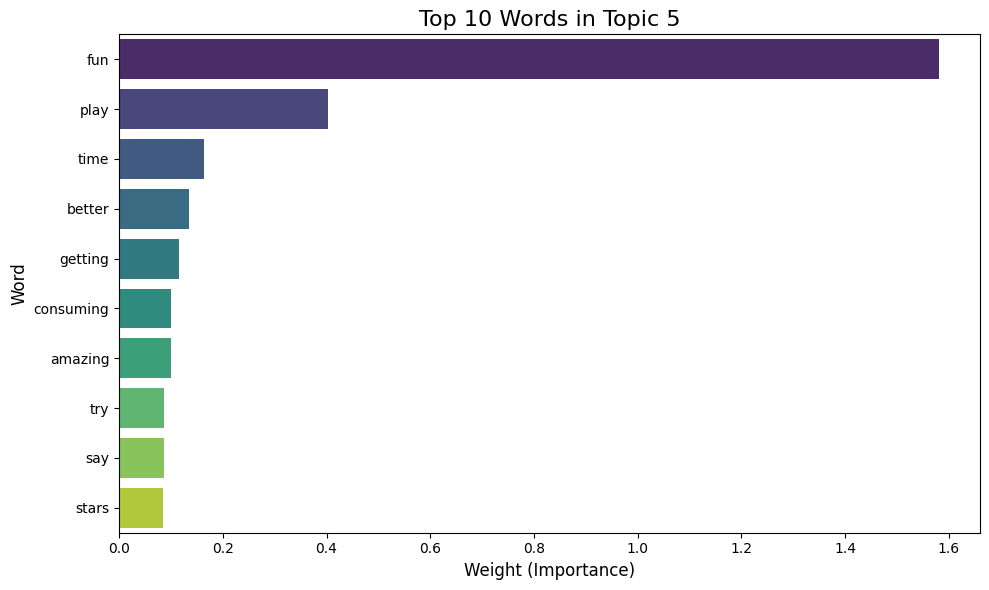

In [62]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# Loop through each topic and create a bar chart for its top words
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a DataFrame for the top words in the current topic
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]

    topic_df = pd.DataFrame({'word': top_words, 'weight': top_weights})

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='weight', y='word', data=topic_df, palette='viridis')
    plt.title(f'Top {num_top_words} Words in Topic {topic_idx + 1}', fontsize=16)
    plt.xlabel('Weight (Importance)', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.tight_layout()
    plt.show()

In [64]:
!pip install wordcloud

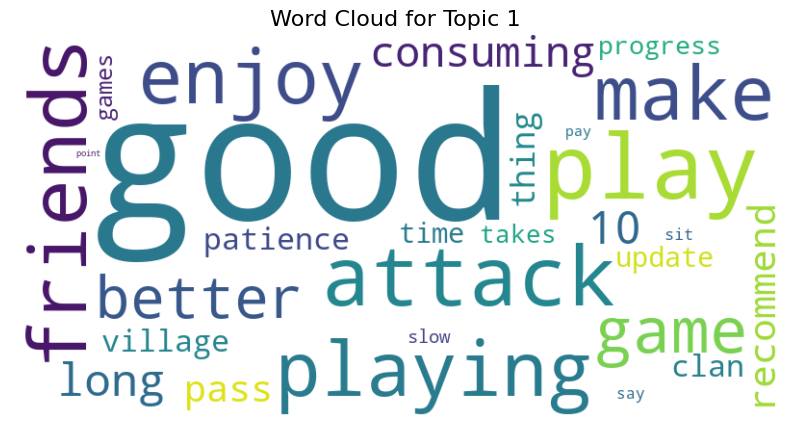

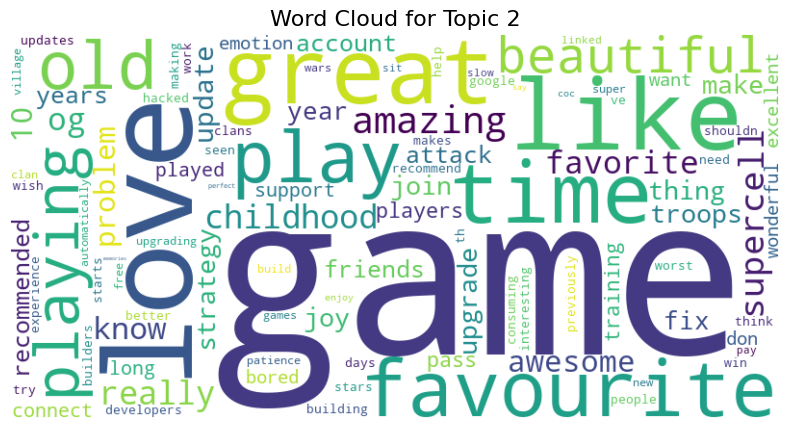

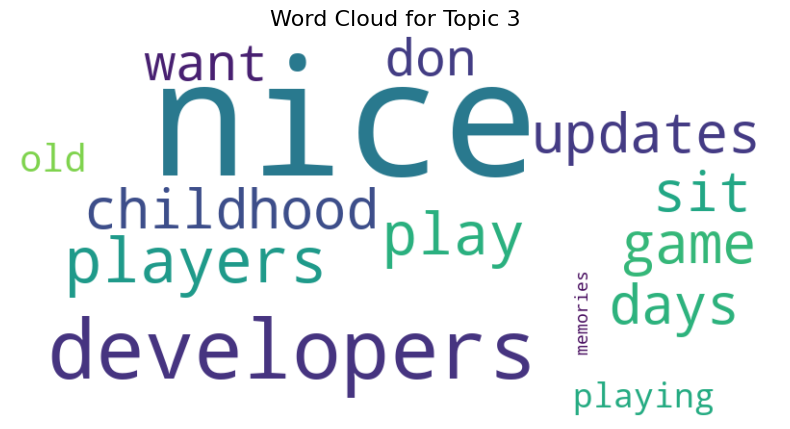

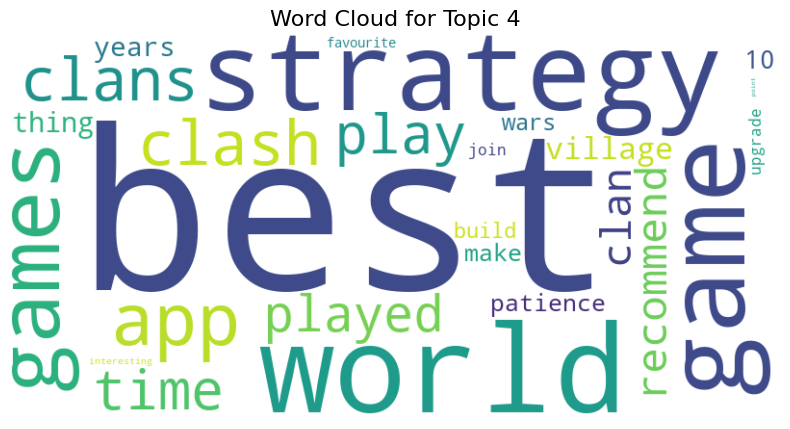

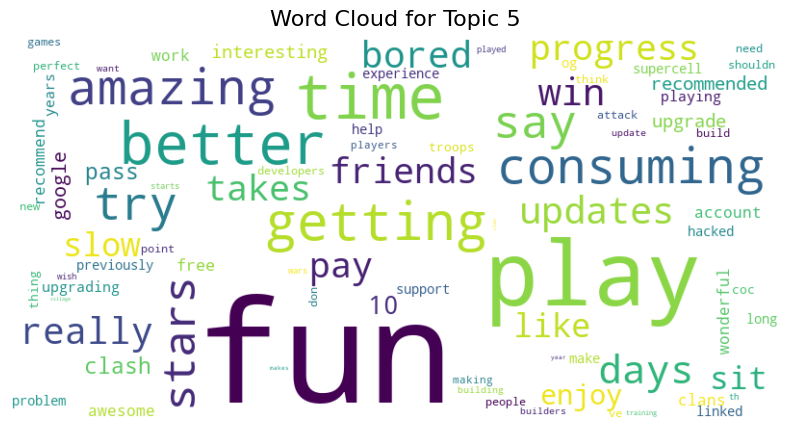

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic and create a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_idx + 1}', fontsize=16)
    plt.axis('off')
    plt.show()